In [1]:
import enefit
import pandas as pd
from datetime import datetime
import statistics

In [2]:
# pulling in data
trainingData = pd.read_csv("/kaggle/input/predict-energy-behavior-of-prosumers/train.csv");
clientData = pd.read_csv("/kaggle/input/predict-energy-behavior-of-prosumers/client.csv");
elecPriceData = pd.read_csv("/kaggle/input/predict-energy-behavior-of-prosumers/electricity_prices.csv");
foreWeatherData = pd.read_csv("/kaggle/input/predict-energy-behavior-of-prosumers/forecast_weather.csv");
gasPriceData = pd.read_csv("/kaggle/input/predict-energy-behavior-of-prosumers/gas_prices.csv");
histWeatherData = pd.read_csv("/kaggle/input/predict-energy-behavior-of-prosumers/historical_weather.csv");
weatherToCountyMap = pd.read_csv("/kaggle/input/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv");

In [3]:
# common variables
timeName = 'datetime'
date_format = '%Y-%m-%d %H:%M:%S'

In [4]:
# averages of target consumption/production per county across the day
averagedData = pd.DataFrame(columns=[timeName, 'averagedTarget'])

rowIndex = 0
while rowIndex < len(trainingData):
    timeStamp = trainingData[timeName][rowIndex]
    endRowIndex = rowIndex
    while endRowIndex < len(trainingData) and trainingData[timeName][endRowIndex] == timeStamp:
        endRowIndex += 1
    
    average = statistics.mean(trainingData['target'][rowIndex:endRowIndex])
    newRow = [{timeName:timeStamp, 'averagedTarget': average}]
    averagedData = pd.concat([averagedData, pd.DataFrame(newRow)], ignore_index=True)
    currDataTime = datetime.strptime(timeStamp, date_format)
    rowIndex = endRowIndex
    

averagedData

,datetime,averagedTarget
0,2021-09-01 00:00:00,162.821066
1,2021-09-01 01:00:00,158.007623
2,2021-09-01 02:00:00,157.891287
3,2021-09-01 03:00:00,155.967221
4,2021-09-01 04:00:00,158.767344
...,...,...
15307,2023-05-31 19:00:00,302.997677
15308,2023-05-31 20:00:00,269.585538
15309,2023-05-31 21:00:00,257.369131
15310,2023-05-31 22:00:00,247.781654


<Axes: xlabel='datetime'>

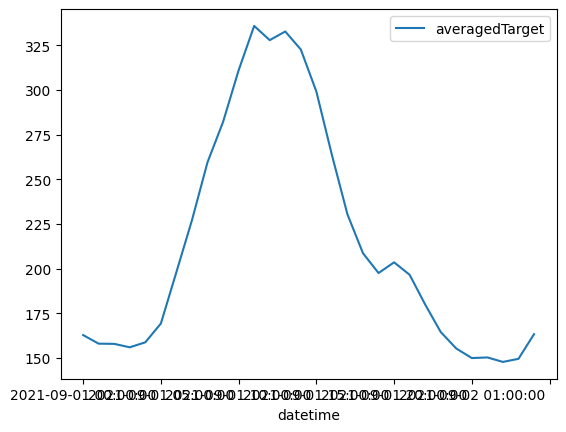

In [5]:
averagedData[0:30].plot(x='datetime', y='averagedTarget', style='-')